## SIAMESE NETWORK

#### Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#### Load Data (MNIST)

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#### Neural Network Definition

In [5]:
# Define the input shape
input_shape = (28, 28, 1)

# Create the base neural network model using the Functional API
inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

base_model = models.Model(inputs, outputs)

#### Compile and train the model

In [6]:
# Compile the model
base_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history = base_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 [==============================] - 53s 34ms/step - loss: 0.5222 - accuracy: 0.8096 - val_loss: 0.4096 - val_accuracy: 0.8471
Epoch 2/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.3406 - accuracy: 0.8752 - val_loss: 0.3439 - val_accuracy: 0.8744
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2925 - accuracy: 0.8930 - val_loss: 0.3159 - val_accuracy: 0.8868
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2621 - accuracy: 0.9046 - val_loss: 0.2764 - val_accuracy: 0.8999
Epoch 5/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.2361 - accuracy: 0.9132 - val_loss: 0.2685 - val_accuracy: 0.9007
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2137 - accuracy: 0.9216 - val_loss: 0.2675 - val_accuracy: 0.9035
Epoch 7/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1938 - accuracy: 0.9281 - val_loss: 0.2758 -

#### Euclidean Distance

In [8]:
# Create an embedding model
embedding_model = models.Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Get embeddings for the test images
test_embeddings = embedding_model.predict(test_images)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

# Example: Calculate Euclidean distance between the first two test embeddings
distance = euclidean_distance(test_embeddings[0], test_embeddings[1])
print(f'Euclidean distance between first two test images: {distance}')



313/313 [==============================] - 4s 11ms/step
Euclidean distance between first two test images: 20.239852905273438


313/313 [==============================] - 7s 20ms/step
General accuracy based on distance threshold: 0.61


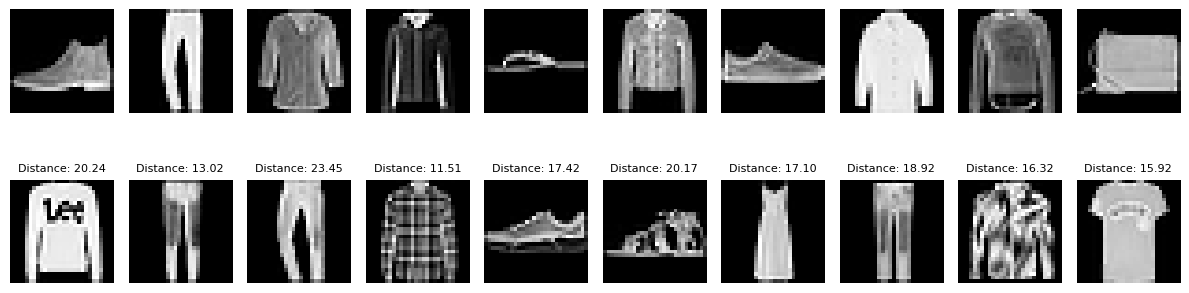

In [13]:
# Create an embedding model
embedding_model = models.Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

# Get embeddings for the test images
test_embeddings = embedding_model.predict(test_images)

# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

# Calculate Euclidean distances for each pair of images in the test set: 1-2, 3-4, 5-6, etc.
distances = []
labels = []
predicted_labels = []
for i in range(0, len(test_embeddings), 2):
    if i + 1 < len(test_embeddings):
        distance = euclidean_distance(test_embeddings[i], test_embeddings[i + 1])
        distances.append(distance)
        actual_label = test_labels[i] == test_labels[i + 1]
        labels.append(actual_label)
        predicted_label = distance < np.mean(distances)  # Binary classification based on distance threshold
        predicted_labels.append(predicted_label)

# Calculate general accuracy
accuracy = np.mean(np.array(predicted_labels) == np.array(labels))
print(f'General accuracy based on distance threshold: {accuracy:.2f}')

# Function to plot pairs of images with their Euclidean distances
def plot_pairs_with_distances(images, distances, n=10):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        idx = i * 2
        plt.subplot(2, n, i + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(2, n, n + i + 1)
        plt.imshow(images[idx + 1].squeeze(), cmap='gray')
        plt.title(f'Distance: {distances[i]:.2f}',fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 10 pairs of images with their distances
plot_pairs_with_distances(test_images, distances, n=10)